In [1]:
#%% Imports
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import "local" packages
import hyspec_io, hyspec_ml, image_render, preprocess 

In [4]:
#%% Paths
tmp_save_dir = Path('/media/mha114/Massimal2/Massimal/X_TemporaryDeletableFiles/PrelimSkalmenDeglint')
# im_paths = ['/media/mha114/Massimal2/Massimal/Smola_Skalmen/Hyperspectral/20230620/2a_Rrs/Skardskjaringen_Pika_L_31-Crop Wavelengths.bip.hdr',
#             '/media/mha114/Massimal2/Massimal/Smola_Skalmen/Hyperspectral/20230620/2a_Rrs/Skardskjaringen_Pika_L_32-Crop Wavelengths.bip.hdr', # første eksempel
#             '/media/mha114/Massimal2/Massimal/Smola_Skalmen/Hyperspectral/20230620/2a_Rrs/Skardskjaringen_Pika_L_79-Crop Wavelengths.bip.hdr', # dyp sand midt i bildet
#             '/media/mha114/Massimal2/Massimal/Smola_Skalmen/Hyperspectral/20230620/2a_Rrs/Skardskjaringen_Pika_L_81-Crop Wavelengths.bip.hdr',
#             '/media/mha114/Massimal2/Massimal/Smola_Maholmen/Hyperspectral/20230621/2a_Rrs/Maholmen_02_Pika_L_24-Crop Wavelengths.bip.hdr',
#             '/media/mha114/Massimal2/Massimal/Smola_Maholmen/Hyperspectral/20230621/2a_Rrs/Maholmen_02_Pika_L_30-Crop Wavelengths.bip.hdr', # godt eksempel
#             '/media/mha114/Massimal2/Massimal/Smola_Maholmen/Hyperspectral/20230621/2a_Rrs/Maholmen_02_Pika_L_42-Crop Wavelengths.bip.hdr',
#             '/media/mha114/Massimal2/Massimal/Smola_Maholmen/Hyperspectral/20230621/2a_Rrs/Maholmen_03_Pika_L_20-Crop Wavelengths.bip.hdr', # godt eksempel
#             '/media/mha114/Massimal2/Massimal/Smola_Maholmen/Hyperspectral/20230621/2a_Rrs/Maholmen_03_Pika_L_25-Crop Wavelengths.bip.hdr',
#             '/media/mha114/Massimal2/Massimal/Smola_Maholmen/Hyperspectral/20230621/2a_Rrs/Maholmen_03_Pika_L_32-Crop Wavelengths.bip.hdr'] # godt eksempel
im_paths = ['/media/mha114/Massimal2/Massimal/Smola_Skalmen/Hyperspectral/20230620/2a_Rrs/Skardskjaringen_Pika_L_31-Crop Wavelengths.bip.hdr',
            '/media/mha114/Massimal2/Massimal/Smola_Skalmen/Hyperspectral/20230620/2a_Rrs/Skardskjaringen_Pika_L_79-Crop Wavelengths.bip.hdr',
            '/media/mha114/Massimal2/Massimal/Smola_Skalmen/Hyperspectral/20230620/2a_Rrs/Skardskjaringen_Pika_L_81-Crop Wavelengths.bip.hdr'] 

im_paths = [Path(p) for p in im_paths]
sgc_train_im_paths = im_paths 


In [5]:
# W_pca, X_mean, X_scale = train_image_pca(image_paths=sgc_train_im_paths,verbose=True)
W_pca, X_mean = hyspec_ml.train_image_pca(image_paths=sgc_train_im_paths,verbose=True,normalize=False)

Opening image 1 of 3
Opening image 2 of 3
Opening image 3 of 3
Collected data matrix has shape (269911, 255)
Fitting PCA model...
Done.


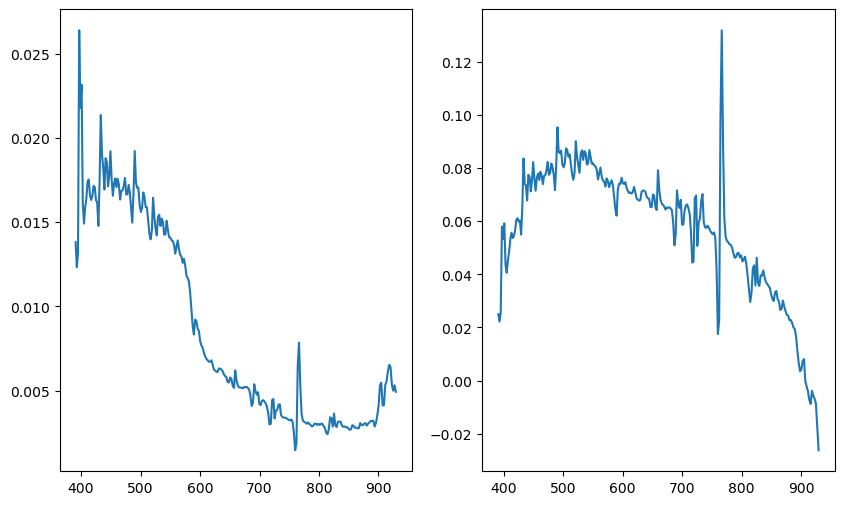

In [20]:
fig,ax = plt.subplots(ncols=2,figsize=(10,6))
ax[0].plot(wl,X_mean)
ax[1].plot(wl,W_pca[0])

In [12]:
image_path = im_paths[-3] 
print(image_path)

/media/mha114/Massimal2/Massimal/Smola_Skalmen/Hyperspectral/20230620/2a_Rrs/Skardskjaringen_Pika_L_31-Crop Wavelengths.bip.hdr


In [13]:
(image,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(image_path)

In [14]:
image_noglint = hyspec_ml.remove_sun_glint_pca(image,W_pca,X_mean)

In [15]:
print(image_noglint.shape)

(2000, 900, 255)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


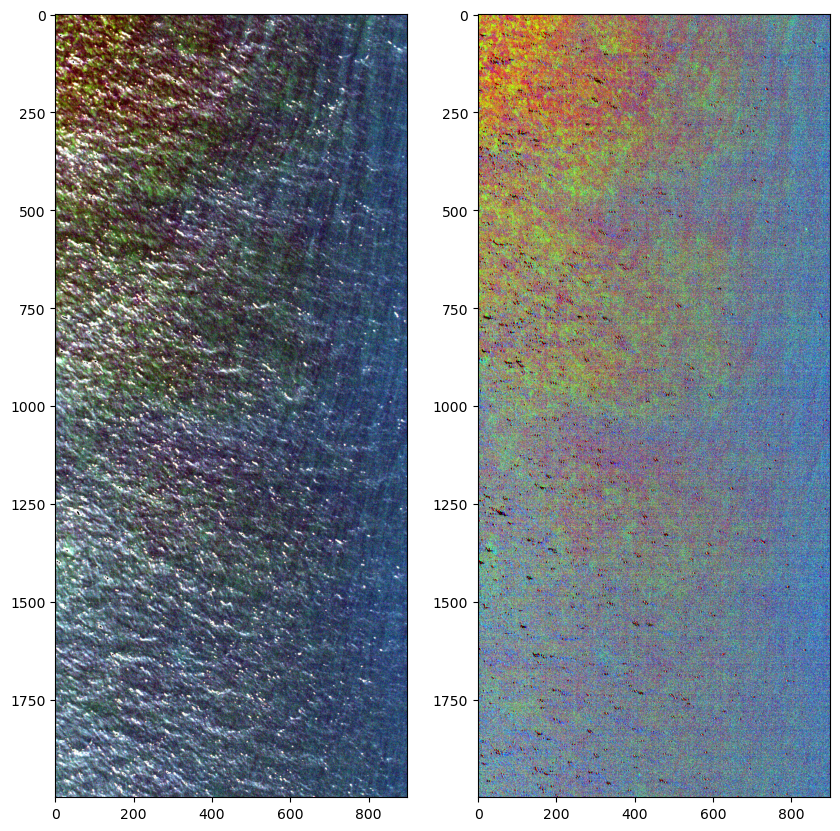

In [16]:
fig,ax = plt.subplots(ncols=2,figsize=(10,12))
ax[0].imshow(image_render.percentile_stretch(image[:,:,rgb_ind]))
ax[1].imshow(image_render.percentile_stretch(image_noglint[:,:,rgb_ind]))
plt.show()

In [17]:
# Save image
file_base, file_ext = image_path.name.split('.',maxsplit=1)
hyspec_ml.save_pca_scg_image_envi(image_noglint,metadata,tmp_save_dir,file_base,header_file_ext=file_ext)